In [295]:
# Importing libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statistics
import math 
# !pip install statsmodels
from statsmodels.graphics import tsaplots

### Question 1

Daily energy intake in kJ was measured for 11 women (Altman, 1991): 5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770. We wish to investigate whether the women’s energy intake deviates systematically from a recommended value of 7725 kJ. Assuming this data comes from a normal distribution; use a t-test to test whether the distribution might have a mean of 7725 kJ. Explain whether a left-tail, right-tail or two-tailed test is appropriate. __Give the sample mean, sample standard deviation, standard error of the mean (SEM), t statistic, degrees of freedom and p-value__. Finally explain if the null hypothesis is rejected or not.

###### Six numbers   &  Two qualitative answers.

In [296]:
# The population mean is 7725
# Null hypothesis (Ho): The women’s energy intake have a mean of 7725 kJ. Ho=> µ = 7725
# Alternative hypothesis (H1): The women’s energy intake deviates systematically from the mean of 7725 kJ. H1 => µ ≠ 7725

sampleDailyEnergy = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] # Sample women’s energy intake in kJ 

print("The sample mean is:", statistics.mean(sampleDailyEnergy))                    # Calculating and displaying the sample mean

# Using statistics.stdev to estimate the standard deviation from a population using sample of data
print("The sample standard deviation is:", statistics.stdev(sampleDailyEnergy))     # The sample standard deviation
print("The standard error of the mean (SEM) is:", stats.sem(sampleDailyEnergy))     # The standard error of the mean (SEM) 
print("The degrees of freedom is:", len(sampleDailyEnergy) - 1)                     # The degree of freedom dF = n − 1

# Calculating the t statistic and p-value
tStatistic, pValue = stats.ttest_1samp(a = sampleDailyEnergy, popmean = 7725)
print("The t statistic is:", tStatistic)
print("The p-value is:", pValue)

# A two-tailed hypothesis is an appropriate test because the alternative hypothesis contains the not equal “≠” sign.
# Hence the p-value(0.018137235176105812) is less than (alpha level) α = 0.05, the null hypothesis can be rejected.
# This confirms that the women’s energy intake deviates systematically from a recommended value of 7725 kJ.

The sample mean is: 6753.636363636364
The sample standard deviation is: 1142.1232221373727
The standard error of the mean (SEM) is: 344.3631083801271
The degrees of freedom is: 10
The t statistic is: -2.8207540608310193
The p-value is: 0.018137235176105812


### Question 2
A Guinness Overall Enjoyment Score (GOES) was used to test if __Guinness served in an Irish pub tastes significantly better than pints served elsewhere around the globe.__ Pints consumed in Ireland received a mean GOES score of 74, while the average GOES score for Guinness tasted elsewhere was 57. The full results were as follows:

    Location | Sample Size | Mean | Standard Deviation
    Ireland  | 42          | 74   | 7.4
    Elsewhere| 61          | 57   | 7.1

- Is this difference of 74 versus 57 significant, or is it simply due to natural, random variation? 
[the result is significant when the z-score is far into either the left or right tail of the distribution.]
- Use a t-test and explain whether a one-sample, two-sample or paired test is appropriate. 
- Show the steps of calculating the t statistic and explain whether a left-tailed, right-tailed or two-tailed test is required. - Give the resulting p-value.

In [297]:
# Ho: Guinness served in an Irish pub is better than pints served elsewhere around the globe: Ir > Else
# H1: Guinness served in an Irish pub is not better than pints served elsewhere around the globe: !(Ir > Else)
# This is a 2-sample t-test as it analyzes the difference between the means of two independent samples.
################################################################################################################################

# Two-Sample T-Test Formula for degree of freedom => dF = n1 + n2 − 2
sampleSizeIrel = 42      # n1
sampleSizeElse = 61      # n2
meanIrel = 74            # mean1
meanElse = 57            # mean2
stdIrel = 7.4            # std1
stdElse = 7.1            # std2

# dF = sampleSizeIrel + sampleSizeElse -2   # Calculating the degree of freedom
# print("The degree of freedom is:", dF)

# Try out the z as well z = x −μ0 / (σ / n)
# Calculating the t-statistic and p-value: steps of calculating the t statistic: https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html
tStat, pVal = stats.ttest_ind_from_stats(mean1 = meanIrel, std1 = stdIrel, nobs1 = sampleSizeIrel, mean2 = meanElse, std2 = stdElse, nobs2 = sampleSizeElse, equal_var = False) 
print("The t statistic is:", tStat)
print("The p-value is:", pVal)

################################################################################################################################
# If p<=α, the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.
# The difference of 74 and 57 is significant, because the p value is lower than the significance level(α), hence the null hypothesis is ruled out

# Two-Sample T-Test is appropriate because we are analysing the difference between the means of two independent samples.
#  left-tailed, right-tailed or two-tailed test is required, ?????  

################################################################################################################################
# a 1-sample t-test compares one sample mean to a null hypothesis value.
# A one sample t-test is used to compare the mean of a sample to a known value. Like in Question 1

# A paired t-test simply calculates the difference between paired observations (e.g., before and after) and then performs a 1-sample t-test on the differences
# Paired t-tests require dependent samples: or one sample of pairs.

# The 2-sample t-test takes your sample data from two groups and boils it down to the t-value. 
# Use the 2-sample t-test when you want to analyze the difference between the means of two independent samples

The t statistic is: 11.647653131319812
The p-value is: 2.3158901628742276e-19


### Question 3
- Use data from the World Bank Indicators for 2013 to study the relationship between Fertility rate, total (births per woman) versus GDP per capita PPP (current international $)
- Make a carefully labelled graph with one dot per country. 
- Estimate the correlation coefficient and give your interpretation.

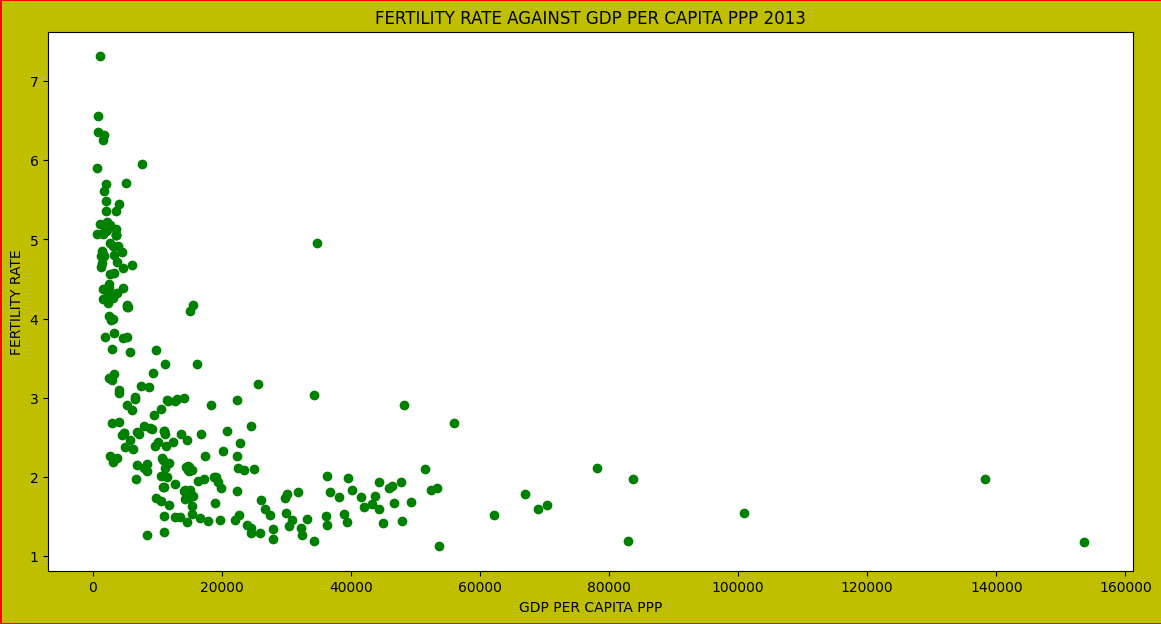

In [298]:
fertRate = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls', sheet_name = 'Data', skiprows = 3)    # Reading fertility rate data from excel file
gdpPC = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_4546474.xls', sheet_name = 'Data', skiprows = 3)    # Reading GDP data from excel file

# Extracting only Country Name and the year 2013 to use
fertRateExtracted = fertRate[['Country Name', '2013']]
gdpPCExtracted= gdpPC[['Country Name', '2013']]

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("FERTILITY RATE AGAINST GDP PER CAPITA PPP 2013")
plt.xlabel("GDP PER CAPITA PPP")
plt.ylabel("FERTILITY RATE")

# Plotting Fertility rate versus GDP per capita PPP for 2013 year
plt.scatter(gdpPCExtracted['2013'], fertRateExtracted['2013'], marker = 'o', color = 'g')

# Showing the plot
plt.show()

# The fertility rate decreases significantly as the GDP increases.
# Countries with low GDP have a tremendous number of births per woman.

In [299]:
# Computing pairwise correlation given columns, excluding NA/null values.
ccf = gdpPCExtracted['2013'].corr(fertRateExtracted['2013'])
 
print("The correlation coefficient is:", ccf)     # Showing the result
# We have a negative relationship between our the fertility rate and GDP as correlation coefficient value is less than zero.
# Negative coefficients tells that when the fertility rate increases, the value of the GDP tends to decrease.

The correlation coefficient is: -0.525513538022326


### Question 4
Load in monthly average house price data in pounds sterling (£) from Jan 1991 to Dec 2016. 
- Download the data from here (choose the file UK monthly indices (Post ‘91)). 
- Graph the time series and label it carefully.
- Construct the autocorrelation function (ACF) of the monthly returns defined as r(t) = [p(t)/p(t-1)]-1 and show the values for lags of one up to20 using a bar-graph. 
- Indicate the values of the ACF using horizontal lines that would correspond to a statistically significant result at p<0.05.
- From the ACF of monthly data is there evidence of seasonality? 
- Is therea trend in the time series? What is the annualized return over this period as a percentage?

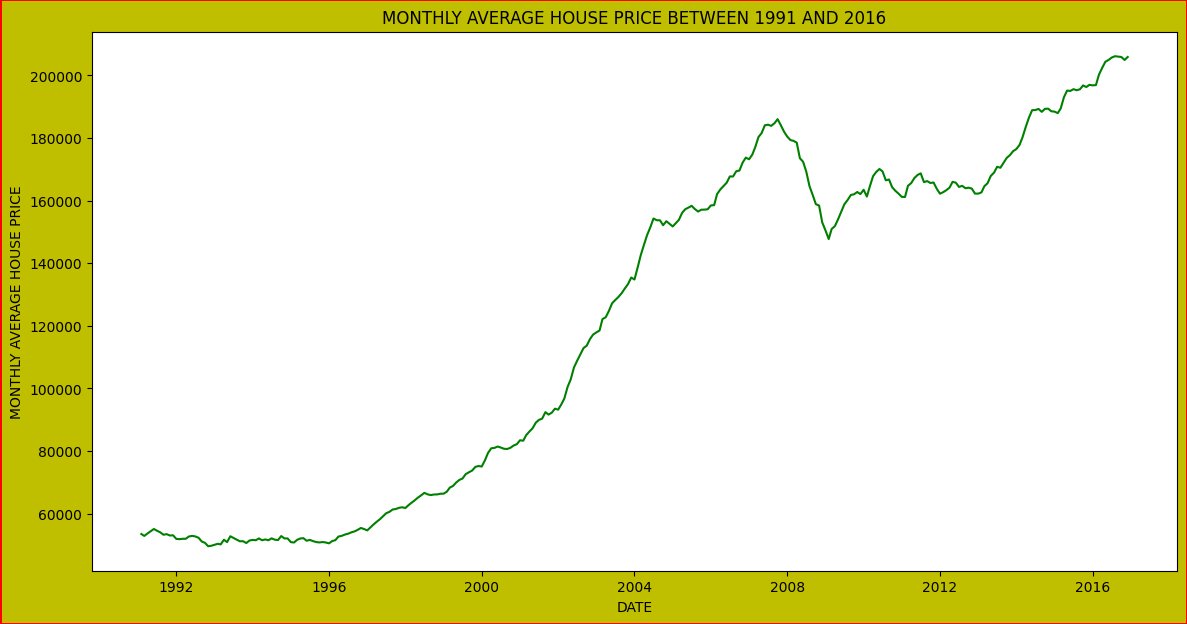

In [300]:
mAvgHousePrice = pd.read_excel('Monthly Average House Price.xls')    # Reading Monthly Average House Price data from excel file

mAvgHousePriceRenamed = mAvgHousePrice.rename(columns={'Unnamed: 0': 'Date'}) # Naming the Date column

# Accessing or selecting the data between 1991-01-01 and 2016-12-31 period
mAvgHousePrice19912016 = mAvgHousePriceRenamed.loc[(mAvgHousePriceRenamed['Date'] > '1991-01-01') & (mAvgHousePriceRenamed['Date'] <= '2016-12-31')]

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("MONTHLY AVERAGE HOUSE PRICE BETWEEN 1991 AND 2016")
plt.xlabel("DATE")
plt.ylabel("MONTHLY AVERAGE HOUSE PRICE")

# Plotting the average house price of the period between 1991-01-01 and 2016-12-31
plt.plot(mAvgHousePrice19912016['Date'], mAvgHousePrice19912016['Average House Price'], color = 'g')

# Showing the plot
plt.show()
# The graph shows that the monthly average increases by the time.

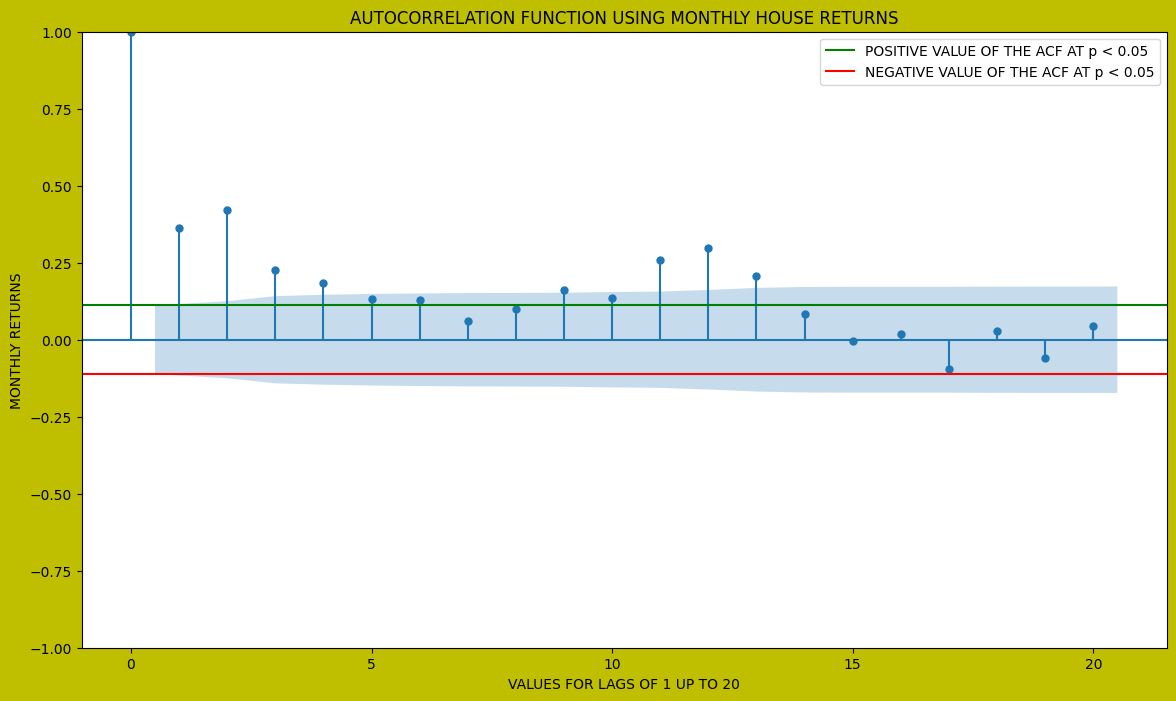

In [301]:
# r(t) = [p(t)/p(t-1)]-1
AHPMonthlyReturns = []

for k in range(2, len(mAvgHousePrice19912016['Average House Price'])+1):     # Calculating and storing the returns into the list
    AHPMonthlyReturns.append((mAvgHousePrice19912016['Average House Price'][k] / mAvgHousePrice19912016['Average House Price'][k - 1]) - 1)
    
# Plotting: Defining figure properties
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

# Plotting the ACF function using the monthly returns
fig = tsaplots.plot_acf(AHPMonthlyReturns, lags = 20)

# Adding the title and labels to the plot
plt.title("AUTOCORRELATION FUNCTION USING MONTHLY HOUSE RETURNS")
plt.ylabel("MONTHLY RETURNS")
plt.xlabel("VALUES FOR LAGS OF 1 UP TO 20")

# The formula for the ACF corresponding to (p = 0.05) is (+ or -) 1.96/(n)**0.5, where n = number of datapoints
value1 = 1.96 / (len(AHPMonthlyReturns) ** 0.5)
value2 = -1.96 / (len(AHPMonthlyReturns)** 0.5)

# Indicating the values of the ACF at p < 0.05 by using horizontal lines
plt.axhline(value1, color = 'g', label = 'POSITIVE VALUE OF THE ACF AT p < 0.05')
plt.axhline(value2, color = 'r', label = 'NEGATIVE VALUE OF THE ACF AT p < 0.05')

plt.legend()

# Showing the plot
plt.show()

In [302]:
# From the ACF of monthly data is there evidence of seasonality?
# Is there a trend in the time series? What is the annualized return over this period as a percentage?

In [1]:
# ANNUALIZED RETURN OVER  
# AHPMonthlyReturns
months = len(AHPMonthlyReturns)

# Calculate the total rate of return
totalReturn = (AHPMonthlyReturns[-1] - AHPMonthlyReturns[0]) / AHPMonthlyReturns[0]
print (totalReturn)

# Calculate the annualized returns over months
annualizedReturn = pow((1 + totalReturn), (12 / months)) - 1
print (annualizedReturn)

NameError: name 'AHPMonthlyReturns' is not defined

### Question 5
- Load in the FTSE100 index from here (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016). 
- Plot the cumulative returns from the House market (using the price data from question 4) and the FTSE100 index on the same graph with the time series normalized such that each starts at 100 in Jan-1991. 
- What is the average annualized return from the FTSE100? Would it have been better to invest in a UK house or the UK stock market over this period?

In [304]:
ftse100 = pd.read_csv('FTSE100.csv')                                  # Reading FTSE100 data from excel file
mAvgHousePrice = pd.read_excel('Monthly Average House Price.xls')     # Reading Monthly Average House Price data from excel file

mAvgHousePriceRenamed = mAvgHousePrice.rename(columns={'Unnamed: 0': 'Date'})  # Renaming the unnamed date field in house prices

ftse100['Date'] = pd.to_datetime(ftse100['Date']) # Converting to date time
ftse100Sorted = ftse100.sort_values(by = 'Date', ascending = True)    # Sorting the date to match the house prices data set

# Extracting house price data for the period of (01-Jan-1991 to 31-Dec-2016) | No need for FTSE since its period is correct
mAvgHousePrice19912016 = mAvgHousePriceRenamed.loc[(mAvgHousePriceRenamed['Date'] >= '1991-01-01') & (mAvgHousePriceRenamed['Date'] <= '2016-12-31')]

ftse100Returns = []                                                    # List to store the FTSE100 returns
housePricesReturns = []                                                # List to store the House prices returns

for i in range(1, len(ftse100Sorted['Adj Close'])):                    # Calculating and storing the returns into the list
    ftse100Returns.append((ftse100Sorted['Adj Close'][i] / ftse100Sorted['Adj Close'][i - 1]) - 1)

for i in range(1, len(mAvgHousePrice19912016['Average House Price'])): # Calculating and storing the returns into the list
    housePricesReturns.append((mAvgHousePrice19912016['Average House Price'][i] / mAvgHousePrice19912016['Average House Price'][i - 1]) - 1)

housePricesReturns.info()
# Finding the cumulative sum of returns for FTSE100 and average monthly house prices
ftseCumSum = np.cumsum(ftse100Returns)
mAvgHousePrice19912016CumSum = np.cumsum(housePricesReturns)

# Normalizing cumulative sum of returns to start at 100
ftseCumSumNorm = (ftseCumSum / ftseCumSum[0]) * 100
mAvgHousePrice19912016CumSumNorm = (mAvgHousePrice19912016CumSum / mAvgHousePrice19912016CumSum[0]) * 100

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("FTSE100 & MONTHLY AVERAGE HOUSE PRICE UNTIL 2016")
plt.xlabel("DATE")
plt.ylabel("FTSE100 & MONTHLY AVERAGE HOUSE PRICE")

ftse100Date = ftse100Sorted['Date'][1:]
mAvgHousePrice19912016Date = mAvgHousePrice19912016['Date'][1:]

# Plotting 
plt.plot(pd.to_datetime(ftse100Date), ftseCumSumNorm, color = 'r')
plt.plot(pd.to_datetime(mAvgHousePrice19912016Date), mAvgHousePrice19912016CumSumNorm, color = 'g')

# Showing the plot
plt.show()

AttributeError: 'list' object has no attribute 'info'